<a href="https://colab.research.google.com/github/CSID-DGU/2020-2-OSSP1-WhatsUp-5/blob/master/model/DataEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd "/content/drive/Shareddrives/와썹_공개SW/GPT2_MNews"

/content/drive/Shareddrives/와썹_공개SW/GPT2_MNews


In [2]:
!pip install -r requirements.txt

     |████████████████████████████████| 256kB 12.1MB/s 
     |████████████████████████████████| 1.1MB 35.6MB/s 
     |████████████████████████████████| 675kB 51.2MB/s 
     |████████████████████████████████| 68.7MB 42kB/s 
     |████████████████████████████████| 890kB 49.1MB/s 
     |████████████████████████████████| 3.8MB 27.6MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.9.1-cp36-cp36m-linux_x86_64.whl size=470039 sha256=2c560a6fa57eab7ac4de36f7c0aabc53491cd0c6fab5b755e676a48d3fb70424
  Stored in directory: /root/.cache/pip/wheels/af/60/16/1f8a40e68b85bd9bd7960e91830bca5e40cd113f3220b7e231
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=648e891e2d4bd184c3cabeaf9dbd7b1742fe7ce5d256bea8cbb96f629c1e6254
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built gluonnlp sacremoses
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
    

In [3]:
import numpy as np
import pandas as pd
import os
import re
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

제목데이터

In [4]:
DATA_IN_PATH = '/content/drive/Shareddrives/와썹_공개SW/crawling_DATA/edited_csv/TITLE/'
TRAIN_DATA_FILE = ['refine_titles.csv']

#sents = [s[:-1] for s in open(DATA_IN_PATH + TRAIN_DATA_FILE).readlines()]

본문기사데이터

In [5]:
DATA_IN_PATH = '../crawling_DATA/edited_csv/학습시킬csv파일들/'

TRAIN_DATA_FILE = ['noblank_refined_g_health.csv',
                   'DocDocDocNews_content.csv',
                   'noblank_refined_health_chosun.csv',
                   'MedicalDaily_content.csv',
                   'MedicineNews_content.csv',
                   'WhoSaengNews_content.csv',
                   'noblank_refined_medical_times.csv',
                   'k-health_content.csv',
                   'noblank_refined_medi_gate.csv'
                   ]

#sents = [s[:-1] for s in open(DATA_IN_PATH + TRAIN_DATA_FILE).readlines()]

In [6]:
input_data = []
output_data = []
test=[]
for datasets in TRAIN_DATA_FILE:
  f_med=open(DATA_IN_PATH+datasets,'r',encoding='utf-8')
  rdr=csv.reader(f_med)
  
  for line in rdr:
    for s in line:
      print(s)
      test.append(s)
     

피부 수분막 보호 위해 에센스·보습크림 중요 비가 오락가락 하는 장마철이다. 장마의 영향으로 최근 습도는 평균 80% 내외로 높다. 습도와 피부에 대해 잘못된 상식 중 하나가 바로 ‘습도가 높으면 피부는 촉촉해진다’는 것이다. 이는 틀린 상식이다. 장마철에는 공기중의 수분이 많고 후덥지근한 날씨 때문에 땀이 많아 나 피부가 항상 촉촉하다고 생각하기 쉽지만 이는 피지분비가 활발해 유분기가 증가한 것으로 오히려 피부는 수분이 부족한 경우가 많다. 또 장마철 같이 습도가 높을 때는 진균류의 감염이 빨라져 피부 염증 등이 늘어나거나 피부염의 증세가 더욱 심해질 수 있으니 주의해야 한다. 대한피부과의사회에서는 “습한 날씨 속에 에어컨 선풍기의 강한 바람은 오히려 피부건조를 유발한다”며 “진균류 감염이 빨라지기도 하니 무엇보다 위생청결은 물론 사전사후 피부 보습 대책이 필요하다”고 충고했다. 장마철 피부건강 대책을 알아본다. ◇ 습도 높아지면 진균류 감염 늘어 고온 다습한 환경에 노출됐을 때 피부 미생물의 숫자가 증가할 수 있으며 특히 진균의 피부 투과 속도가 빨라져 감염이 증가하게 된다. 실제로 습도가 높은 계절에는 진균성 피부염 환자가 3~5배 증가한다. 진균성 피부염의 대표적인 질환인 무좀이나 살모넬라균 이질균 대장균 등과 같은 그람음성균의 증식이 활발해져 여드름처럼 보이는 모낭염이 발생하기도 한다. 모낭염은 피지 분비가 많은 남자에게 잘 생기는 피부 질환으로 노란색의 농포가 얼굴 중앙부인 입술 턱 코 주변부 뺨 등에 잘 생긴다. 여드름과는 달리 좁쌀 같은 면포가 없고 그 부위가 가려운 것이 특징이다. 무좀이나 모낭염 등의 피부염은 습진이나 여드름 등 비슷한 증세의 질환과 구별이 어려워 집에서 자가 치료를 하거나 민간요법에 의지한다면 2차 감염이 생길 수 있고 특히 장마철에는 세균의 번식이 쉬워 더욱 심각한 부작용이 생길 수 있어 주의해야 한다. 습도가 높은 장마철에는 무엇보다 피부의 청결을 유지하는 것이 중요하다. 피지 관리를 위해 세안을 자주 해주고 화장은 이중

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 = BRCA1 BRCA2 등 BRCA 변이유전자는 여성에게 유방암과 난소암 위험을 크게 높이는 것으로 유명하다. 남성도 이 변이유전자가 있으면 유방암은 물론 전립선암 등 다른 암이 발생할 위험이 크게 높아진다는 연구결과가 나왔다. 미국 로스앤젤레스 캘리포니아대학 의대 외과 전문의 크리스토퍼 차일더스 박사 연구팀이 암 변이유전자 검사를 받은 약 250만 명의 자료를 분석한 결과 이 같은 사실이 확인됐다고 26일 보도했다. BRCA 변이유전자를 지닌 남성은 다른 남성에 비해 유방암 위험이 100배 높은 것으로 나타났다고 차일더스 박사는 밝혔다. 이 변이유전자를 가진 남성은 또 젊은 나이에 발생하는 공격적인 형태의 전립선암 췌장암 흑색종 위험도 높아지는 것으로 밝혀졌다. 이 연구결과는 미국 의사협회 학술지 '종양학' 최신호에 실렸다. = BRCA1 BRCA2 등 BRCA 변이유전자는 여성에게 유방암과 난소암 위험을 크게 높이는 것으로 유명하다. 남성도 이 변이유전자가 있으면 유방암은 물론 전립선암 등 다른 암이 발생할 위험이 크게 높아진다는 연구결과가 나왔다. 미국 로스앤젤레스 캘리포니아대학 의대 외과 전문의 크리스토퍼 차일더스 박사 연구팀이 암 변이유전자 검사를 받은 약 250만 명의 자료를 분석한 결과 이 같은 사실이 확인됐다고 26일 보도했다. BRCA 변이유전자를 지닌 남성은 다른 남성에 비해 유방암 위험이 100배 높은 것으로 나타났다고 차일더스 박사는 밝혔다. 이 변이유전자를 가진 남성은 또 젊은 나이에 발생하는 공격적인 형태의 전립선암 췌장암 흑색종 위험도 높아지는 것으로 밝혀졌다. 이 연구결과는 미국 의사협회 학술지 '종양학' 최신호에 실렸다. 
 = 올해 10월부터 생리대 포장지에 모든 성분이 표시된다. 앞으로는 제모왁스도 공산품이 아닌 화장품으로 관리되고 산모용패드와 화장솜 등 여성용품에 대한 안전관리 방안도 마련된다. 식품의약품안전처는 27일 안심하고 여성용품을 사용할 수 있는 환경 조성을 위해 '여성건강 안심 프로젝트'를 마련해 시행한다고 밝

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



동아시아인들에게 자주 발생하는 식도편평상피암 치료에 로봇수술 장비를 이용하면 생존율을 높인다는 결과가 발표됐다. 이번 연구결과는 기존에 발표된 미국-유럽쪽 식도평편상피세포암 환자 생존율보다 높고, 수술 후 3년 이상의 장기추적 관찰을 토대로 한 최초의 보고라는 점에서 의미가 있다. 세브란스병원 흉부외과 김대준·박성용 교수팀은 지난 2006년부터 2014년까지 로봇수술기를 이용한 식도 및 림프절 절제술을 받은 111명의 식도편평상피암 환자들을 대상으로 수술 후 장기 생존 및 재발률을 관찰했다.  연구대상 환자들은 모두 수술 전 항암 방사선 치료를 받지 않았다. 2±08세 였다. 6%) 를 보였다. 5%)의 환자는 원격전이 상태를 보였다. 2%가 생존했다.  5년 생존율은 Ⅰ기 89%, Ⅱ기 75%, ⅢA기 78%였다. 4%가 재발을 보이지 않았다. 5% 였다. 이는 기존에 발표된 미국-유럽 쪽 식도평편상피세포암 환자 생존율보다 월등하게 높은 결과라는 게 연구팀의 설명이다. 미국암연합회(AJCC)와 국제항암연맹(UICC)에 따르면, 식도평편상피암 환자의 5년 생존율은 I기의 경우 60%, II기는 45%, IIIA기는 25%이다.  이는 위암, 유방암, 대장암 등 주요 암종별 5년 생존율에 비해 낮다. 로봇수술 후 치료성적이 좋은 이유로 정교한 박리와 림프절 절제가 가능하다는 점과 이로 인해 합병증을 줄일 수 있기 때문인 것으로 예측되고 있다. 식도편평상피암은 식도암의 한 종류로 한국, 일본 등 동아시아지역에 거주하는 사람들에게서 주로 발견된다.  우리나라의 경우 식도암 환자의 92%, 일본은 93%가 편평상피암으로 알려져있다. 식도평편상피세포암은 초기 단계에서도 림프절 전이가 빈번하게 일어난다.  발생 장소와 림프절 전이 양상이 서구에서 쉽게 발생하는 식도선암과 달라 수술방법에도 차이가 난다. 식도 상부 주변의 양측 성대 신경 부근 림프절을 세밀하게 완전히 제거하는 고난도 수술방식이 필요하다. 연구를 진행한 김대준 교수는 “기존에 발표된 미국-유럽쪽 식도평편상피

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



서울시, '2008 서울푸드페스티벌' 22일부터 개최서울특별시는 '2008 서울푸드페스티벌'을 오는 8월 22일부터 31일까지 10일간 청계광장, 경희궁, 서울역사박물관, 남산골한옥마을, N서울타워 등 서울의 주요 명소 다섯 곳에서 'Taste of Seoul'을 주제로 개최한다고 밝혔다.서울시가 주최하는 이 축제는 우리 한식의 우수성을 세계에 알리고 한국의 고유한 음식문화를 서울의 새로운 관광아이템으로 발전시키기 위해 개최되며, 축제에 참여하는 시민들과 외국인 관광객들에게 한식에 담긴 정성과 맛을 체험할 수 있는 기회를 제공할 것이다.서울의 새로운 명소로 떠오른 청계광장에서는 음식이 곧 보약이라는 우리조상들의 메시지를 담고 있는 오미음식이 소개되고, 불고기, 비빔밥 등 한국의 대표음식도 선보일 예정이다.또한, 레오강, 김소희, 레이먼킴, 김상민, 박재영 등 한식을 세계화한 유명 요리사들이 참여하는 한식조리 시연회와 Bboy공연, 세계의 공연, 퓨전국악 공연 등 풍성한 문화공연이 함께 어우러져 축제의 흥을 돋울 것으로 기대된다.음식을 소재로 기네스 세계기록에 도전하는 '2008 서울기네스푸드페스티벌'의 첫 번째 행사인 '서울푸드파이터대회'가 8월 23일 오후 3시부터 청계광장에서 개최될 예정이다.매운 고추 많이 먹기와 핫도그 많이 먹기, 레몬 빨리 먹기 등 이색 기록에 도전하는 행사가 열리며, 한국기록 수립 시 한국기록원에서 인증서를 전달하고 영국 기네스 협회로 기록등재를 신청할 계획이다.행사 참여 신청과 기타 문의 사항은 서울시 다산콜센터를 통해 안내받을 수 있으며, 홈페이지에서도 확인할 수 있다.식약청, '고추장 된장'도 정제 형태로 제조 허가식품의약품안전청은 식염, 장류, 복합조미식품 등 일반식품을 정제형태로 제조하여 판매할 수 있도록 식품의 제조가공기준을 합리적으로 개정하였다고 밝혔다.의약품이나 건강기능식품과 오인 혼동할 우려가 없는 식염, 장류, 복합조미식품, 당류가공품을 정제형태로 제조할 수 있도록 규제를 합리화함으로써 다양한 신제품 개발과 운송비 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



분당서울대병원 흉부외과 전상훈 교수 대한흉부심장혈관외과학회장으로 취임했다./사진=분당서울대병원 제공 분당서울대병원 흉부외과 전상훈 교수가 지난 6일, 제52차 대한흉부심장혈관외과학회 총회에서 제49대 회장으로 취임했다. 전상훈 신임 학회장은 경북대 의대를 졸업하고 폐암, 식도암, 종격동 종양을 비롯해 다양한 폐질환 분야의 발전을 위해 헌신해왔다. 아시아 흉강경수술교육단 회장, 대한흉부종양학회장을 역임했으며, 현재 아시아심장혈관흉부외과학회장을 맡고 있다. 분당서울대병원장 재임 시절에는 병원의 공공성 강화를 위한 다양한 활동을 제안했을 뿐만 아니라, 헬스케어산업이 지향해야 할 방향을 새롭게 제시하며 병원 한류를 이끄는 글로벌 리더십을 발휘하기도 했다. 전상훈 학회장은 “국내 흉부심장혈관질환 수술의 질적 향상과 정도 관리를 학회의 발전 목표로 삼고 있다”며 “학회의 국제화 전략 방안을 모색할 뿐만 아니라 학회의 활동이 사회적인 가치 창출에도 기여할 수 있도록 최선의 노력을 다하겠다”고 말했다.
순천향대 부천병원 성형외과 남승민·서울병원 송우진 교수/사진=순천향대 부천병원 제공 순천향대병원 성형외과 남승민·송우진 교수팀이 최근 흉터 성형술의 만족도를 높이는 ‘복합 레이저 성형술’의 효과와 안정성을 입증했다. 일반적으로 신체 흉터를 없애기 위해 흉터 부위를 제거하고 다시 정교하게 봉합하는 ‘흉터 성형술’을 시행한다. 하지만 이 방법은 상처가 치유되는 동안 피부에 붉어짐과 단단함 등이 지속되어 흉터 성형술의 효과가 감소하는 단점이 있었다. 이를 해결하기 위해 연구팀은 흉터 성형술 후 2~3주 안에 CO2 프락셔널 레이저와 색소 레이저를 이용한 ‘복합 레이저 성형술’을 추가로 시행했다. 그리고 흉터 성형술 후 발생하는 피부의 붉어짐과 단단함 등이 얼마나 빨리 안정화되는지 ‘밴쿠버 흉터 지표’를 이용해 평가했다. 그 결과, 흉터 성형술 후 조기에 복합 레이저 성형술을 시행한 환자는 색소와 단단함, 붉어짐 등의 지표에서 효과가 탁월한 것으로 나타났다. 순천향대 부천병원 성형외

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



영국의 유전자 및 세포 치료제 전문회사인 옥스퍼드 바이오메디카(Oxford Biomedica)가 일본의 산텐제약(Santen Pharmaceutical)과 유전자 치료제를 개발하기 위해 제휴를 맺었다. 옥스퍼드 바이오메디카와 산텐은 26일(현지시간) 유전성 망막질환에 대한 유전자 치료제를 연구하고 개발하기 위해 R&D 제휴와 옵션 및 라이선스 계약을 체결했다고 발표했다. 두 회사에 따르면 유전성 망막질환은 260개가 넘은 유전자 중 하나 때문에 발생하는 희귀 질환군으로 이러한 유전자의 돌연변이는 시력 상실과 실명을 유발할 수 있고 아동과 젊은 성인에게 크게 영향을 미칠 수 있다. 유전성 망막질환은 질병과 연관이 있는 유전적 돌연변이들이 이미 발견됐기 때문에 유전자 치료제를 개발하기에 이상적인 질환이라고 한다. 또한 눈은 쉽게 접근할 수 있는 기관으로 유전자 치료제 벡터를 병든 조직에 직접 전달하는데 용이하다.  렌티바이러스 벡터의 주요 이점은 다른 벡터 시스템으로는 기술적으로 어려운 대형 치료용 유전자를 전달할 수 있다는 것이다. 이 R&D 제휴의 목적은 옥스퍼드 바이오메디카에 의해 개발되고 제조된 렌티바이러스 벡터를 이용해 유전성 망막질환을 치료하는 방법에 대한 전임상 개념증명을 완료하는 것이다. 이 제휴에는 옥스퍼드 바이오메디카의 렌티벡터(LentiVector) 플랫폼을 이용하기 위한 라이선스와 산업규모 제조능력에 대한 접근권이 포함된다. 산텐은 전 세계에서 프로그램에 대한 상업적 권리를 가지며 옥스퍼드 바이오메디카는 미국과 유럽에서 개발 및 상업화에 참여하고 자금을 지원할 수 있는 옵션을 갖는다.  옥스퍼드 바이오메디카는 렌티벡터 플랫폼에 대한 옵션을 행사할 경우 일정한 성과금과 다른 개발 관련 성과금, 최대 10%의 로열티를 받을 수 있는 자격을 갖는다. 옥스퍼드 바이오메디카의 존 도슨 최고경영자는 “산텐는 치료 옵션이 적거나 거의 없는 유전성 망막질환 환자를 위한 혁신적인 유전자 치료제를 개발 중인 선도적인 안과 전문 회사”라며 “중요한 R&D 프로그

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



미국 컬럼비아 대학병원에서는 한림대의료원을 소개하고, 환자진료, 임상연구, 의학교육 및 인적교류와 관련된 상호 협력관계 사실을 보도했다. 컬럼비아 대학병원는 한림대-컬럼비아대-코넬대-뉴욕프레스비테리안병원 4자간의 국제교류협약은 한림대와 컬럼비아대학 간의 기존 임상 및 학술연구 협력관계를 확대 발전 시키는 것이라고 밝혔다. 뉴욕-프레스비테리안 병원의 최고경영자인 허버트 파데스 박사는 한국과 미국에서 양 기관 간의 중요한 이정표를 마련했다면서, 이 교류협약은 한국사회에서 전례가 없었던 첫 국제 교류협약임을 선언했다. 또한 교류협약의 핵심은 의학전문가의 교류이며, 한림대의료원의 의사뿐만 아니라 의과학자를 뉴욕에서 교육훈련을 받게 될 것이며, 협동연구에 참여하고 미국과 한국사회의 한국인을 진료하는데 보다 양질의 진료를 할 수 있게 될 것이라고 말했다. 컬럼비아대 학장인 제랄드 피쉬바흐 박사는 오늘날 우리 의료계에서 안고 있는 문제점은 국경을 초월하여 연구와 교육이 이루어져야 한다면서, 이와 같은 국제교류협력을 통해서 힘을 가지게 되고 질병 퇴치, 의료정책 과제해결, 그리고 삶의 질 향상이라는 위대한 생각에 힘을 모을 수 있다고 주장했다. 아울러 코넬대학 의과대학장인 안토니오 고토 박사는 미국과 한국간의 의료 측면에서 가교를 세움으로써 다양한 환자들의 건강증진에 각별한 기회를 제공하게 됐고 임상연구, 국제의학, 국가의료정책, 학술연구, 및 연속적인 의학교육 등 광범위한 스펙트럼에서 새로운 이니셔티브도 마련했다고 밝혔다. 한림대의료원장 이광학 교수는 또한 학술연구와 최선의 진료개발과 관련된 여러 가지 분야에서의 협력으로 혜택을 받게 될 대상은 궁극적으로 한림대의료원과 뉴욕-프레스비테리안 병원에서 진료받는 환자가 될 것이라고 말했다. 
연세의대는 25일 졸업생 161명에게 학사 학위를 수여했다 연대의료원은 각 대학과 대학원별로 일제히 학위수여식을 갖고 400여명의 보건의료 인력을 배출했다. 연세의대는 최근 김한중 대외행정부총장과 지훈상 의무부총장 겸 의료원장을 비롯한 교수

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



‘OECD국가 중 출산율 꼴찌’ ‘애 키우기 힘든 나라’ ‘연애·결혼·출산 포기하는 삼포세대’ 등… 저출산 고령화시대에 직면해있는 우리나라의 현주소다. 통계청 조사에 따르면 지난해 출생아수는 43만6600명으로 전년 대비 9.9% 감소했다. 여성 1명이 평생 낳을 것으로 예상되는 출생아수는 고작 1.25명. 세계 224개국 중 219위다. 이처럼 심각한 저출산시대를 맞아 미숙아출생률도 나날이 증가하고 있다. 미숙아는 임신기간 37주 미만에 태어나거나 2500g 미만으로 태어난 신생아다. 조산아라고도 한다. 전 세계적으로 미숙아출생률은 7~8% 정도다. 우리나라 상황도 비슷하다. 대한신생아학회에 따르면 국내 미숙아수는 2011년 2만8097명으로 전체 출생아의 6%를 차지했으며 매년 증가하는 추세다. 그중 체중이 1500g 미만인 극소저출생체중아는 1~1.5% 정도였다. 이들은 1993년 929명에서 2011년 2935명으로 300% 이상 급증했다. 가천대길병원 소아청소년과 손동우 교수는 “미숙아출산 증가는 여러 가지 이유가 복합적으로 작용한다”며 “최근에는 고령출산, 임신 중 흡연·음주, 난임치료로 인한 다태아 증가, 스트레스 등 사회적인 영향이 크다”고 설명했다. 이밖에 전치태반, 태반조기박리, 임신성 고혈압, 자궁 내 발육부전 등 태아나 산모, 자궁 문제인 경우도 있다. 조산은 남의 이야기가 아니다. 가임기여성이라면 누구나 미숙아를 낳을 가능성이 있다. 실제 가벼운 접촉사고로 인해 갑자기 조산하는 경우도 종종 발생한다. 미숙아는 만삭아와 달리 각종 질환의 위험에 노출돼있다. 미숙아는 폐가 덜 성숙됐기 때문에 호흡곤란증후군을 겪기 쉽고 신생아만성폐질환이 생길 수 있다. 피부가 얇아 체온조절이 어려운데다 면연력도 크게 떨어진다. 뇌성마비, 지능저하, 시청각이상 등 장애뿐 아니라 미숙아빈혈, 미숙아망막증, 괴사성장염 등 다양한 질환에 걸리기 쉽다. 강동경희대병원 소아청소년과 배종우 교수는 “미숙아는 고위험신생아지만 최근 신생아집중치료실의 발달로 예후가 개선되고 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
train_set = pd.Series(test)
print('유일한 총 문장 수 : {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 문장의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

유일한 총 문장 수 : 101157
반복해서 나타나는 문장의 수: 1724


In [8]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 200
중복 최소 개수: 1
중복 평균 개수: 1.03
중복 표준편차: 0.77
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


In [10]:
train_length = train_set.apply(len)

문장 길이 최대 값: 43367
문장 길이 평균 값: 1207.80
문장 길이 표준편차: 849.36
문장 길이 중간 값: 1014.0
문장 길이 제 1 사분위: 692.0
문장 길이 제 3 사분위: 1505.0


Text(0, 0.5, 'Probability')

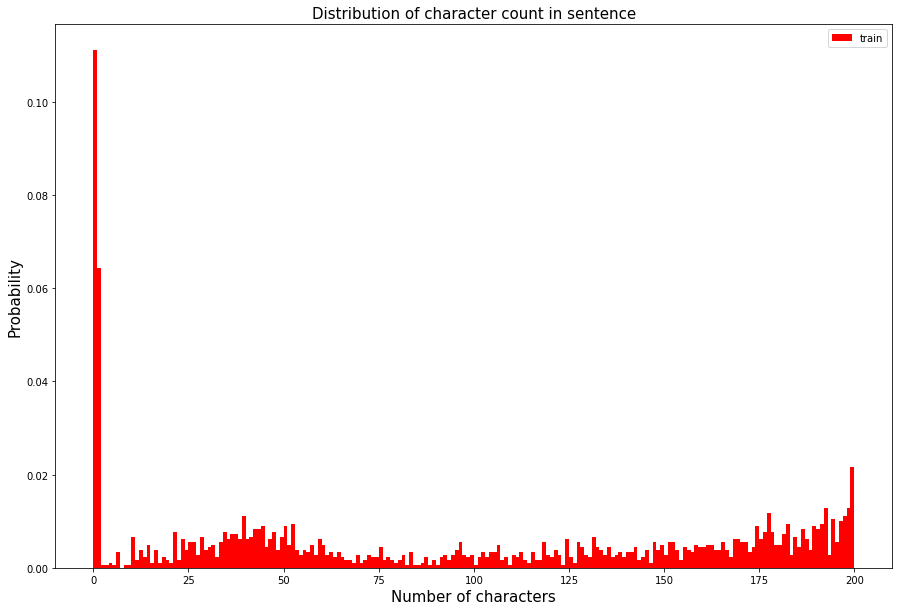

In [11]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))


plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

문장 단어 개수 최대 값: 8270
문장 단어 개수 평균 값: 273.59
문장 단어 개수 표준편차: 205.01
문장 단어 개수 중간 값: 230.0
문장 단어 개수 제 1 사분위: 150.0
문장 단어 개수 제 3 사분위: 348.0
문장 단어 개수 99 퍼센트: 1019.0


Text(0, 0.5, 'Probability')

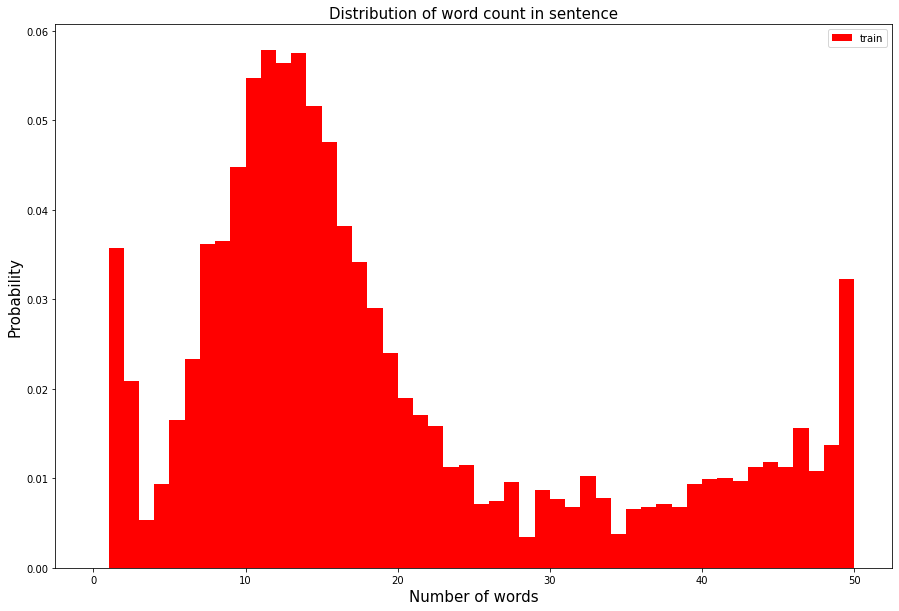

In [12]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Distribution of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [13]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

In [22]:
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

문장 tokens 개수 최대 값: 30934
문장 tokens 개수 평균 값: 763.30
문장 tokens 개수 표준편차: 537.51
문장 tokens 개수 중간 값: 640.0
문장 tokens 개수 제 1 사분위: 437.0
문장 tokens 개수 제 3 사분위: 951.0
문장 tokens 개수 99 퍼센트: 2697.0


Text(0, 0.5, 'Probability')

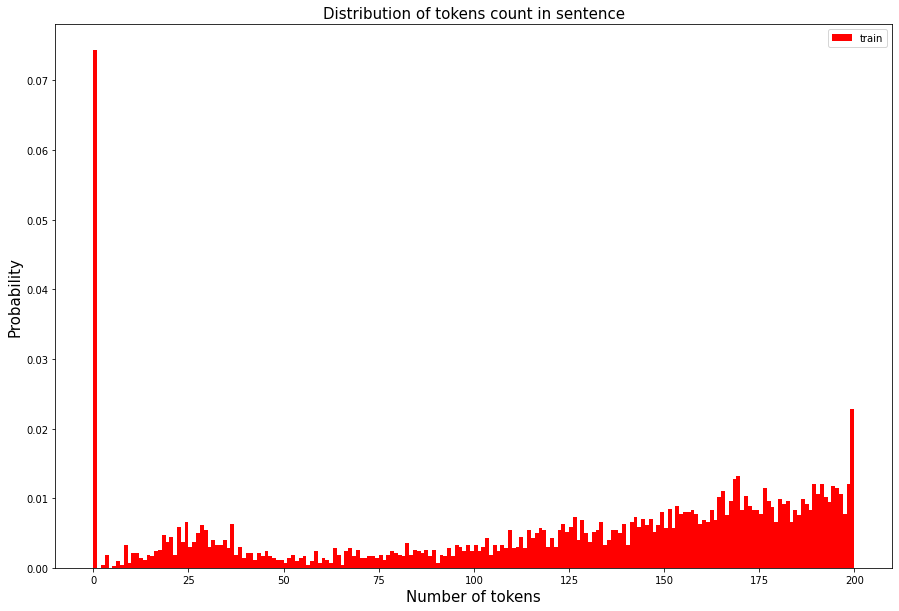

In [23]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Distribution of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Probability', fontsize=15)

텍스트의 최소 길이 : 0
텍스트의 최대 길이 : 8268
텍스트의 평균 길이 : 280.94015149333256


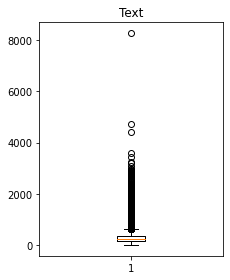

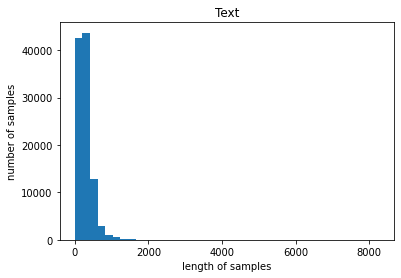

In [24]:
# 길이 분포 출력
text_len = [len(s.split()) for s in test]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))


plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()


plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [ ]:
below_threshold_len(MAX_LEN, test)